In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use("seaborn")

from google.colab import drive
drive.mount('/content/gdrive')
ruta_de_archivos="gdrive/My Drive/Archivos Lab/2019-3/Informe de Gestión 2019-3/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# from matplotlib.colors import LinearSegmentedColormap
# pbllm = LinearSegmentedColormap.from_list("pbllm", ["black","indigo","darkred","darkorange","gold"])

# Cargar datos

In [3]:
practicas=pd.read_csv(ruta_de_archivos+"Practicas_20193.csv", sep=";", decimal=",", encoding="latin_1");print(practicas.dtypes)
programaciones=pd.read_csv(ruta_de_archivos+"Programacion_20193.csv", sep=";", decimal=",", encoding="latin_1");print(practicas.dtypes)
tutorias=pd.read_csv(ruta_de_archivos+"Tutorias_20193.csv", sep=";", decimal=",", encoding="latin_1");print(tutorias.dtypes)
consultas=pd.read_csv(ruta_de_archivos+"Consultas_20193.csv", sep=";", decimal=",", encoding="latin_1");print(consultas.dtypes)
ventas=pd.read_csv(ruta_de_archivos+"Ventas_20193.csv", sep=";", decimal=",", encoding="latin_1");print(ventas.dtypes)

Marca temporal                                      object
Programa                                            object
Nombre del Docente/ Administrativo / Estudiante     object
Tipo de Préstamo                                    object
Asignatura                                          object
Semestre                                            object
Número de Grupo                                    float64
Número de Estudiantes                                int64
Tema a Trabajar                                     object
Fecha Uso de Espacio                                object
Hora de Inicio                                      object
Hora Fin                                            object
Espacio Solicitado                                  object
Nombre del Material Solicitado                      object
dtype: object
Marca temporal                                      object
Programa                                            object
Nombre del Docente/ Administrativo / Estud

In [0]:
practicas["Hora Fin "]=pd.to_datetime(practicas["Fecha Uso de Espacio "]+" "+practicas["Hora Fin "],format='%d/%m/%Y %H:%M:%S')
practicas["Fecha Uso de Espacio "]=pd.to_datetime(practicas["Fecha Uso de Espacio "]+" "+practicas["Hora de Inicio "],format='%d/%m/%Y %H:%M:%S')
tutorias["FECHA"]=pd.to_datetime(tutorias["FECHA"]+" "+tutorias["HORA"],format='%d/%m/%Y %H:%M:%S')
consultas["FECHA"]=pd.to_datetime(consultas["FECHA"]+" "+consultas["HORA"],format='%d/%m/%Y %H:%M:%S')
ventas["Fecha"]=pd.to_datetime(consultas["FECHA"],format='%d/%m/%Y')

practicas["ejecución"]=1
programaciones["ejecución"]=1

In [0]:
programaciones["Docente"]=programaciones["Docente"].astype(str).str.lower()
practicas["Nombre del Docente/ Administrativo / Estudiante"]=practicas["Nombre del Docente/ Administrativo / Estudiante"].astype(str).str.lower()

practicas=practicas.loc[practicas["Fecha Uso de Espacio "]>"2019-08-04",:]
tutorias=tutorias.loc[tutorias["FECHA"]>"2019-08-04",:]
consultas=consultas.loc[consultas["FECHA"]>"2019-08-04",:]
ventas=ventas.loc[ventas["Fecha"]>"2019-08-04",:]


## Prácticas
- Prácticas realizadas
- Uso de espacios 

In [6]:
print(practicas.dtypes)

Marca temporal                                             object
Programa                                                   object
Nombre del Docente/ Administrativo / Estudiante            object
Tipo de Préstamo                                           object
Asignatura                                                 object
Semestre                                                   object
Número de Grupo                                           float64
Número de Estudiantes                                       int64
Tema a Trabajar                                            object
Fecha Uso de Espacio                               datetime64[ns]
Hora de Inicio                                             object
Hora Fin                                           datetime64[ns]
Espacio Solicitado                                         object
Nombre del Material Solicitado                             object
ejecución                                                   int64
dtype: obj

Psicología                    222
Facultad de Humanidades         3
Mercadeo y Publicidad           2
Enfermeria                      2
Posgrados Salud                 1
Administración de Empresas      1
Entrenamiento Deportivo         1
Name: Programa, dtype: int64


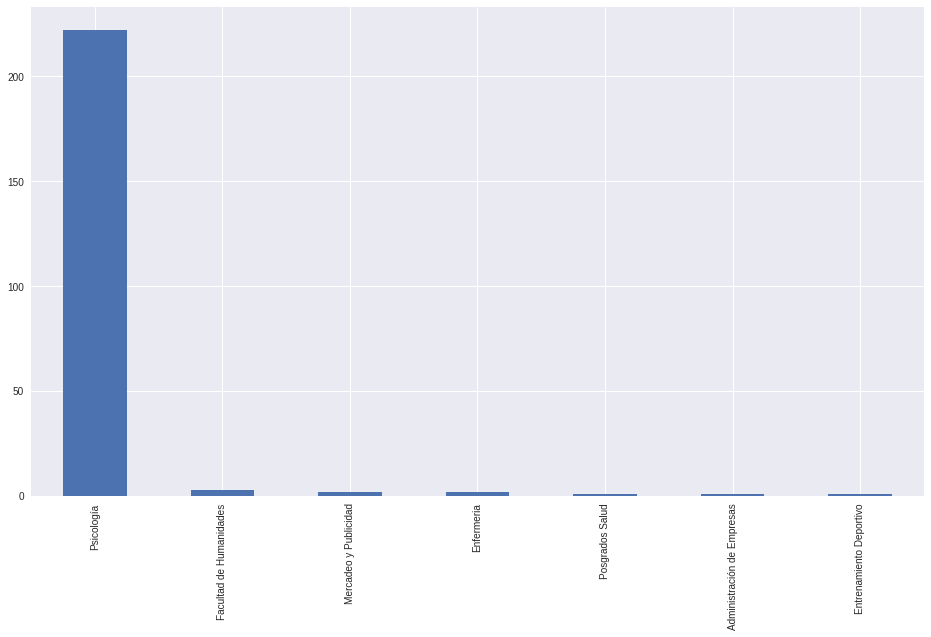

In [7]:
practicas.Programa.value_counts().plot.bar(figsize=(16,9))
# plt.yscale("log")
print(practicas.Programa.value_counts())

luisa fernanda pardo parra          48
nidia cristina buitrago quintero    29
damaris ramos                       21
andrea carolina prieto               9
yerson moreno                        9
jose estevez                         8
cindy bermudez                       6
leidy lopez                          6
teresita carolina cabra florez       6
jorge eduardo moreno                 6
Name: Nombre del Docente/ Administrativo / Estudiante, dtype: int64


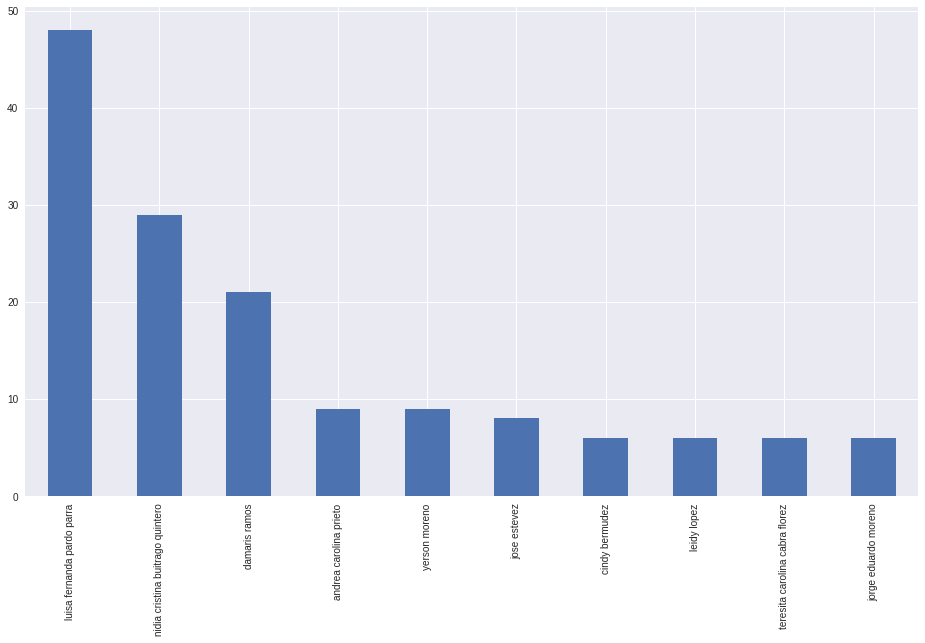

In [8]:
practicas["Nombre del Docente/ Administrativo / Estudiante"].value_counts()[:10].plot.bar(figsize=(16,9))
print(practicas["Nombre del Docente/ Administrativo / Estudiante"].value_counts()[:10])

Prácticas de laboratorio                           73
Préstamo para clases                               59
Préstamo Para Estudiantes                          33
Espacio para semilleros                            27
Asesoría de Práctica                               19
Préstamo para el Simulacro de Pruebas Saber Pro    11
Préstamo Para otros Programas                       9
Práctica Libre Docentes                             1
Name: Tipo de Préstamo , dtype: int64


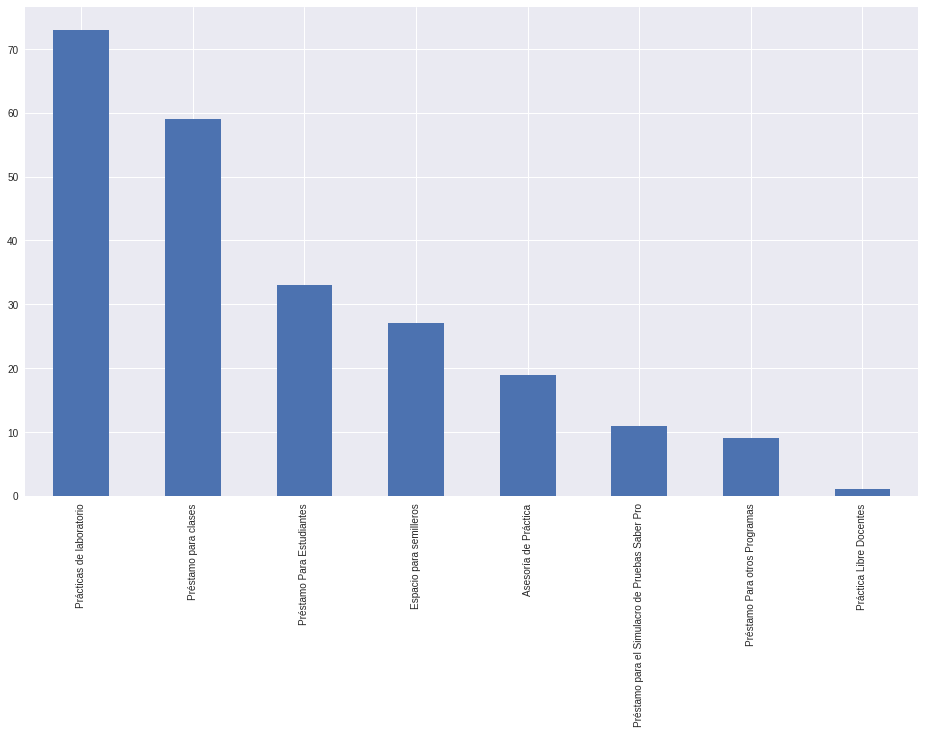

In [9]:
practicas["Tipo de Préstamo "].value_counts()[:15].plot.bar(figsize=(16,9))
print(practicas["Tipo de Préstamo "].value_counts()[:15])

ATENCIÓN, SENSACIÓN Y PERCEPCIÓN                                  26
Semillero Social Jurídico                                         26
No Aplica                                                         19
EVALUACIÓN Y DIAGNÓSTICO EN PSICOLOGÍA CLÍNICA Y DE LA SALUD      15
INTELIGENCIA, LENGUAJE Y CREATIVIDAD                              13
MEDICIÓN Y EVALUACIÓN: APTITUDES Y COMPETENCIAS                   13
APRENDIZAJE Y COGNICIÓN: MODELOS COGNITIVOS                       12
MOTIVACIÓN Y EMOCIÓN                                              11
DESARROLLO Y CICLO VITAL: JÓVENES Y ADULTOS                       10
Prácticas Psicología Organizacional                                9
PSICOMETRÍA BÁSICA                                                 9
INTERVENCIÓN EN CAMPO ELEGIDO-PSICOLOGIA CLINICA Y DE LA SALUD     8
MEDICIÓN Y EVALUACIÓN: ACTITUDES Y CONOCIMIENTOS                   7
Psicología Clínica                                                 6
ANORMAL                           

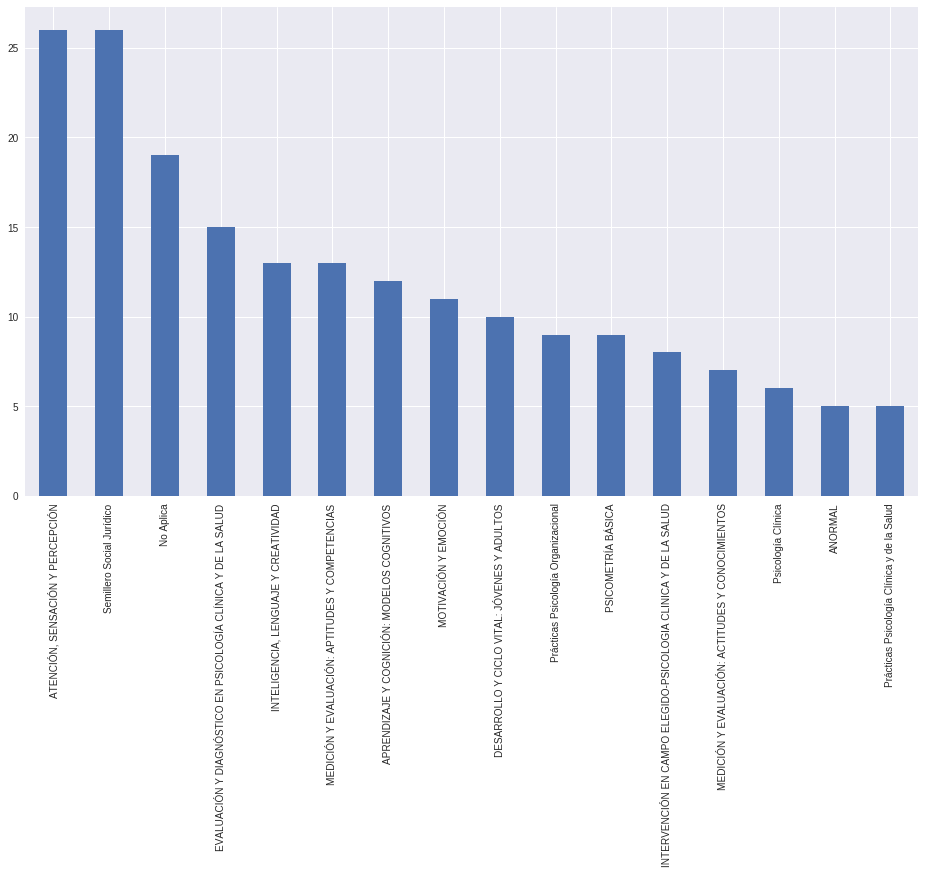

In [10]:
practicas["Asignatura "].value_counts()[:16].plot.bar(figsize=(16,9))
print(practicas["Asignatura "].value_counts()[:15])

Cámara de Gesell    133
Salón Auxiliar       60
Sala de sistemas     39
Name: Espacio Solicitado , dtype: int64


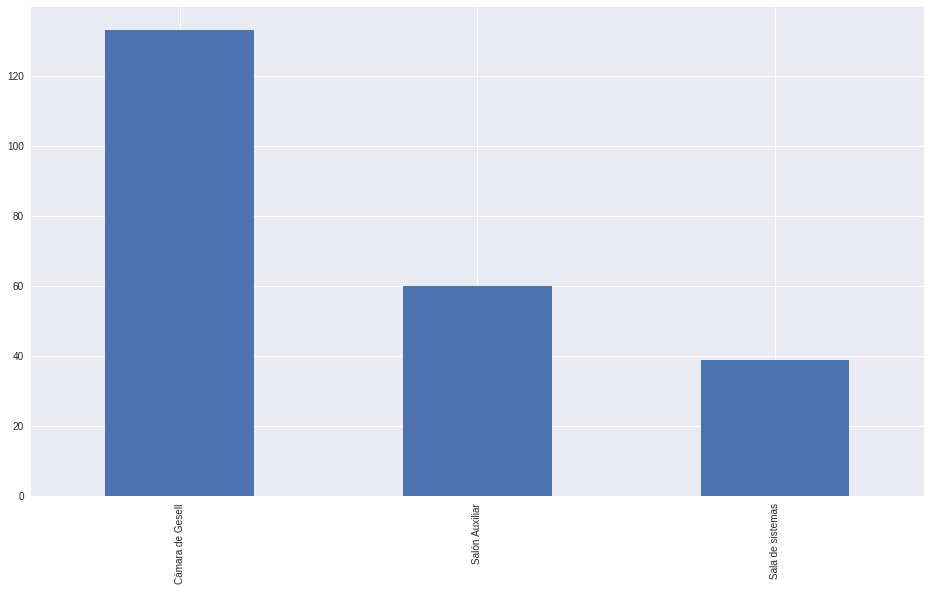

In [11]:
practicas["Espacio Solicitado "].value_counts()[:15].plot.bar(figsize=(16,9))
print(practicas["Espacio Solicitado "].value_counts())

In [12]:
# practicas.Asignatura.value_counts()
# practicas.loc[practicas.Asignatura=="No Aplica",:]
# print(practicas["Tipo de préstamo"].value_counts())
print(practicas.loc[practicas["Tipo de Préstamo "]=="Prácticas de laboratorio","Asignatura "].value_counts())

MEDICIÓN Y EVALUACIÓN: APTITUDES Y COMPETENCIAS                   12
MOTIVACIÓN Y EMOCIÓN                                              11
APRENDIZAJE Y COGNICIÓN: MODELOS COGNITIVOS                       11
INTELIGENCIA, LENGUAJE Y CREATIVIDAD                               8
PSICOMETRÍA BÁSICA                                                 8
ATENCIÓN, SENSACIÓN Y PERCEPCIÓN                                   6
MEDICIÓN Y EVALUACIÓN: ACTITUDES Y CONOCIMIENTOS                   6
DESARROLLO Y CICLO VITAL: JÓVENES Y ADULTOS                        5
APRENDIZAJE Y COGNICIÓN: MODELOS CONDUCTUALES                      3
Investigacion Cuantitativa                                         1
INTERVENCIÓN EN CAMPO ELEGIDO-PSICOLOGIA CLINICA Y DE LA SALUD     1
TEORÍAS Y MÉTODOS EN PSICOLOGÍA: COGNITIVO                         1
Name: Asignatura , dtype: int64


In [13]:
pd.crosstab(index=practicas.loc[practicas["Tipo de Préstamo "]=="Prácticas de laboratorio","Asignatura "],
            columns=practicas.loc[practicas["Tipo de Préstamo "]=="Prácticas de laboratorio","Espacio Solicitado "], 
            margins=True).sort_values("All",axis=0, ascending=False) #.plot.bar(figsize=(16,9))

Espacio Solicitado,Cámara de Gesell,Sala de sistemas,Salón Auxiliar,All
Asignatura,,,,
All,38,11,24,73
MEDICIÓN Y EVALUACIÓN: APTITUDES Y COMPETENCIAS,9,3,0,12
APRENDIZAJE Y COGNICIÓN: MODELOS COGNITIVOS,8,0,3,11
MOTIVACIÓN Y EMOCIÓN,4,3,4,11
"INTELIGENCIA, LENGUAJE Y CREATIVIDAD",6,0,2,8
PSICOMETRÍA BÁSICA,6,1,1,8
"ATENCIÓN, SENSACIÓN Y PERCEPCIÓN",1,0,5,6
MEDICIÓN Y EVALUACIÓN: ACTITUDES Y CONOCIMIENTOS,2,3,1,6
DESARROLLO Y CICLO VITAL: JÓVENES Y ADULTOS,0,0,5,5


In [14]:
pd.crosstab(index=practicas.loc[practicas["Tipo de Préstamo "]=="Préstamo para clases","Asignatura "],
            columns=practicas.loc[practicas["Tipo de Préstamo "]=="Préstamo para clases","Espacio Solicitado "], 
            margins=True).sort_values("All",axis=0, ascending=False).iloc[:15,:] #.plot.bar(figsize=(16,9))
# print(practicas.loc[practicas["Tipo de préstamo"]=="Préstamo para clases","Asignatura"].value_counts())

Espacio Solicitado,Cámara de Gesell,Sala de sistemas,Salón Auxiliar,All
Asignatura,,,,
All,24,7,28,59
EVALUACIÓN Y DIAGNÓSTICO EN PSICOLOGÍA CLÍNICA Y DE LA SALUD,5,0,9,14
INTERVENCIÓN EN CAMPO ELEGIDO-PSICOLOGIA CLINICA Y DE LA SALUD,3,0,4,7
Psicología Clínica,3,1,2,6
ANORMAL,4,0,1,5
FUNDAMENTOS EPISTEMOLÓGICOS DE LA INVESTIGACIÓN,3,0,0,3
INVESTIGACIÓN CUALITATIVA,1,2,0,3
Introducción a la psicología,1,0,2,3
Prácticas Psicología Organizacional,0,3,0,3


In [15]:
pd.crosstab(index=practicas.loc[practicas["Tipo de Préstamo "]=="Préstamo para clases","Nombre del Docente/ Administrativo / Estudiante"],
            columns=practicas.loc[practicas["Tipo de Préstamo "]=="Préstamo para clases","Espacio Solicitado "], 
            margins=True).sort_values("All",axis=0, ascending=False).iloc[1:16,:] #.plot.bar(figsize=(16,9))
# print(practicas["Nombre Del Docente o Administrativo"].value_counts())

Espacio Solicitado,Cámara de Gesell,Sala de sistemas,Salón Auxiliar,All
Nombre del Docente/ Administrativo / Estudiante,,,,
nidia cristina buitrago quintero,10,1,16,27
luisa fernanda pardo parra,3,0,3,6
yerson moreno,0,3,0,3
jorge eliecer rubio,0,0,2,2
sergio enrique clavijo moreno,1,0,1,2
juliana rubiano,0,0,2,2
andres gamba,1,0,1,2
andrea carolina prieto,2,0,0,2
jorge eduardo moreno,2,0,0,2


In [16]:
ejec_uso=pd.crosstab(index=practicas["Nombre del Docente/ Administrativo / Estudiante"],
                     columns=practicas["Tipo de Préstamo "], 
                     margins=True)#.sort_values("All",axis=0, ascending=False).iloc[1:16,:] #.plot.bar(figsize=(16,9))
# print(practicas["Nombre Del Docente o Administrativo"].value_counts())
ejec_uso
# ejec_uso.to_csv(ruta_de_archivos+"ejec_uso.csv")

Tipo de Préstamo,Asesoría de Práctica,Espacio para semilleros,Práctica Libre Docentes,Prácticas de laboratorio,Préstamo Para Estudiantes,Préstamo Para otros Programas,Préstamo para clases,Préstamo para el Simulacro de Pruebas Saber Pro,All
Nombre del Docente/ Administrativo / Estudiante,,,,,,,,,
alejandra cedeno,0,0,0,0,1,0,0,0,1
andrea alvarado,0,0,0,0,0,1,0,0,1
andrea carolina perez,0,0,0,0,1,0,0,0,1
andrea carolina perez bolanos,0,0,0,0,1,0,0,0,1
andrea carolina prieto,0,0,0,7,0,0,2,0,9
...,...,...,...,...,...,...,...,...,...
teresita carolina cabra florez,1,0,0,3,0,0,0,2,6
wilmer vargas,0,0,0,0,1,0,0,0,1
yerson moreno,6,0,0,0,0,0,3,0,9


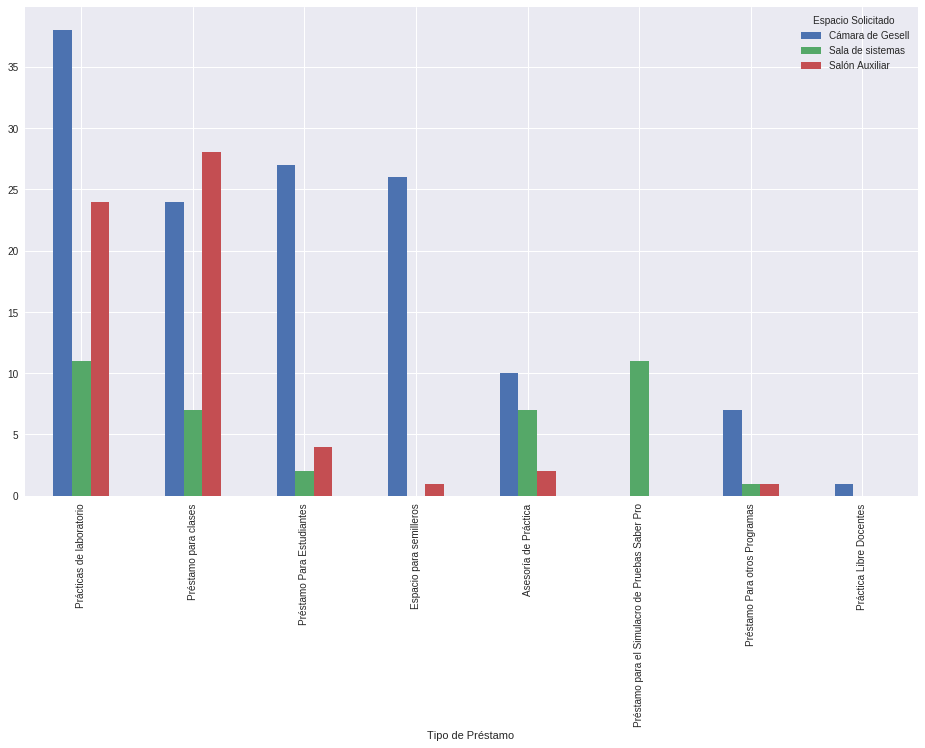

In [17]:
# pd.crosstab(practicas.loc[practicas["Tipo de préstamo"]=="Préstamo para clases","Nombre Del Docente o Administrativo"],
#             practicas.loc[practicas["Tipo de préstamo"]=="Préstamo para clases","Asignatura"])#,rownames="Nombre Del Docente o Administrativo",columns="Asignatura")
pd.crosstab(practicas["Tipo de Préstamo "],
            practicas["Espacio Solicitado "],
            margins=True).sort_values("All", axis=0, ascending=False).iloc[1:,:-1].plot.bar(figsize=(16,9))#,rownames="Nombre Del Docente o Administrativo",columns="Asignatura")

In [18]:
pd.crosstab(index=practicas.loc[practicas["Tipo de Préstamo "]=="Préstamo para clases","Nombre del Docente/ Administrativo / Estudiante"],
            columns=practicas.loc[practicas["Tipo de Préstamo "]=="Préstamo para clases","Espacio Solicitado "], 
            margins=True).sort_values("All",axis=0, ascending=False).iloc[1:16,:] #.plot.bar(figsize=(16,9))

Espacio Solicitado,Cámara de Gesell,Sala de sistemas,Salón Auxiliar,All
Nombre del Docente/ Administrativo / Estudiante,,,,
nidia cristina buitrago quintero,10,1,16,27
luisa fernanda pardo parra,3,0,3,6
yerson moreno,0,3,0,3
jorge eliecer rubio,0,0,2,2
sergio enrique clavijo moreno,1,0,1,2
juliana rubiano,0,0,2,2
andres gamba,1,0,1,2
andrea carolina prieto,2,0,0,2
jorge eduardo moreno,2,0,0,2


In [19]:
ejecutadas_asig=pd.pivot_table(practicas, values="ejecución", index=["Nombre del Docente/ Administrativo / Estudiante","Asignatura "], aggfunc='sum')
programadas_asig=pd.pivot_table(programaciones, values="ejecución", index=["Docente","Catedra"], aggfunc='sum')
programadas_asig.columns=["programadas"]
ejecutadas_asig.columns=["ejecutadas"]
ejecutadas_asig
# prog_ejec_asig=pd.concat([programadas_asig, ejecutadas_asig], axis=1)
# prog_ejec_asig

,,ejecutadas
Nombre del Docente/ Administrativo / Estudiante,Asignatura,
alejandra cedeno,"ATENCIÓN, SENSACIÓN Y PERCEPCIÓN",1
andrea alvarado,No Aplica,1
andrea carolina perez,"INTELIGENCIA, LENGUAJE Y CREATIVIDAD",1
andrea carolina perez bolanos,"INTELIGENCIA, LENGUAJE Y CREATIVIDAD",1
andrea carolina prieto,EVALUACIÓN Y DIAGNÓSTICO EN PSICOLOGÍA CLÍNICA Y DE LA SALUD,2
...,...,...
teresita carolina cabra florez,DESARROLLO Y CICLO VITAL: JÓVENES Y ADULTOS,6
wilmer vargas,"INTELIGENCIA, LENGUAJE Y CREATIVIDAD",1
yerson moreno,ASESORÍA DE PRÁCTICAS,1


In [20]:
ejecutadas_doc=pd.pivot_table(practicas, values="ejecución", index="Nombre del Docente/ Administrativo / Estudiante", aggfunc='sum')
programadas_doc=pd.pivot_table(programaciones, values="ejecución", index="Docente", aggfunc='sum')
programadas_doc.columns=["programadas"]
ejecutadas_doc.columns=["ejecutadas"]
# ejecutadas_doc
programadas_doc
# programadas_doc.to_csv(ruta_de_archivos+"programadas_doc.csv")
# prog_ejec_doc=pd.concat([programadas_doc, ejecutadas_doc], axis=1)
# prog_ejec_doc


,programadas
Docente,
alarcon espitia angela nayive,3
bermudez roa cindy cindy paola,3
cabra florez teresita carolina,6
cardona zea angelo,5
caviedes castro andres mauricio,3
clavijo sergio,2
estevez ceballos jose areth,15
forero cardenas carmen victoria,5
lopez florez leidy hasbleidy,15


In [0]:
# inic_practicas=pd.to_datetime(practicas["Fecha Uso de Espacio "]+" "+practicas["Hora de Inicio "])[0]
# fin_practicas=pd.to_datetime(practicas["Fecha Uso de Espacio "]+" "+practicas["Hora Fin "])[0]

## Consultas.
### Univariados
- Material consultado
- Asignatura
- Semestre
- Programa


In [22]:
print(consultas.dtypes)

No.                              int64
Id                               int64
NOMBRES Y APELLIDOS             object
SEMESTRE                       float64
FECHA                   datetime64[ns]
HORA                            object
MOTIVO SOLICITUD                object
MATERIAL/ SOLICITADO            object
ASIGNATURA                      object
PROGRAMA                        object
CORTE                          float64
dtype: object


4.0     550
6.0     242
5.0     141
2.0     132
8.0      99
7.0      65
3.0      57
10.0     12
9.0      11
1.0       1
Name: SEMESTRE, dtype: int64


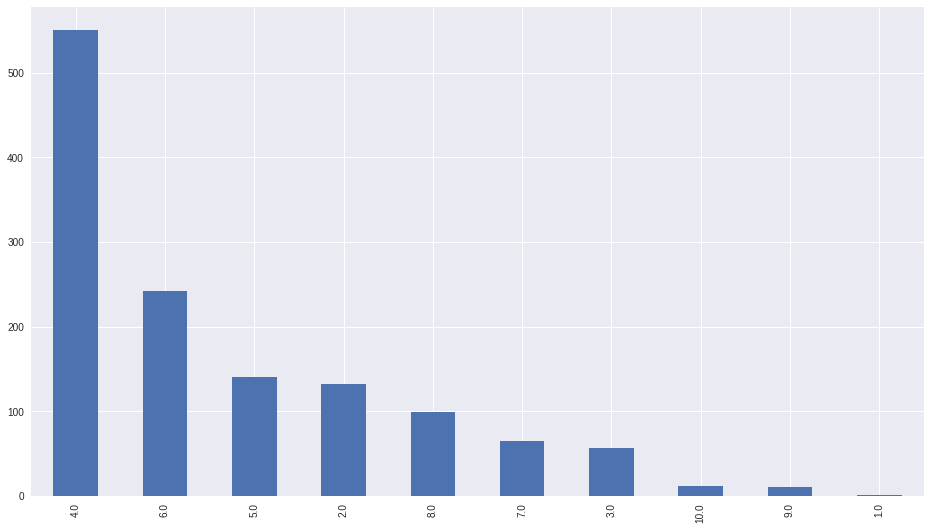

In [23]:
consultas.SEMESTRE.value_counts().plot.bar(figsize=(16,9))
print(consultas.SEMESTRE.value_counts())

NEUROPSI                                                              149
WAIS IV                                                               117
BETA                                                                   47
TEA-1                                                                  38
BADyG - M                                                              35
D-70                                                                   34
DAT - 5                                                                33
OTIS                                                                   30
D-2                                                                    28
BANFE                                                                  27
D-48                                                                   26
BETA III                                                               26
RIAS                                                                   26
EHS                                   

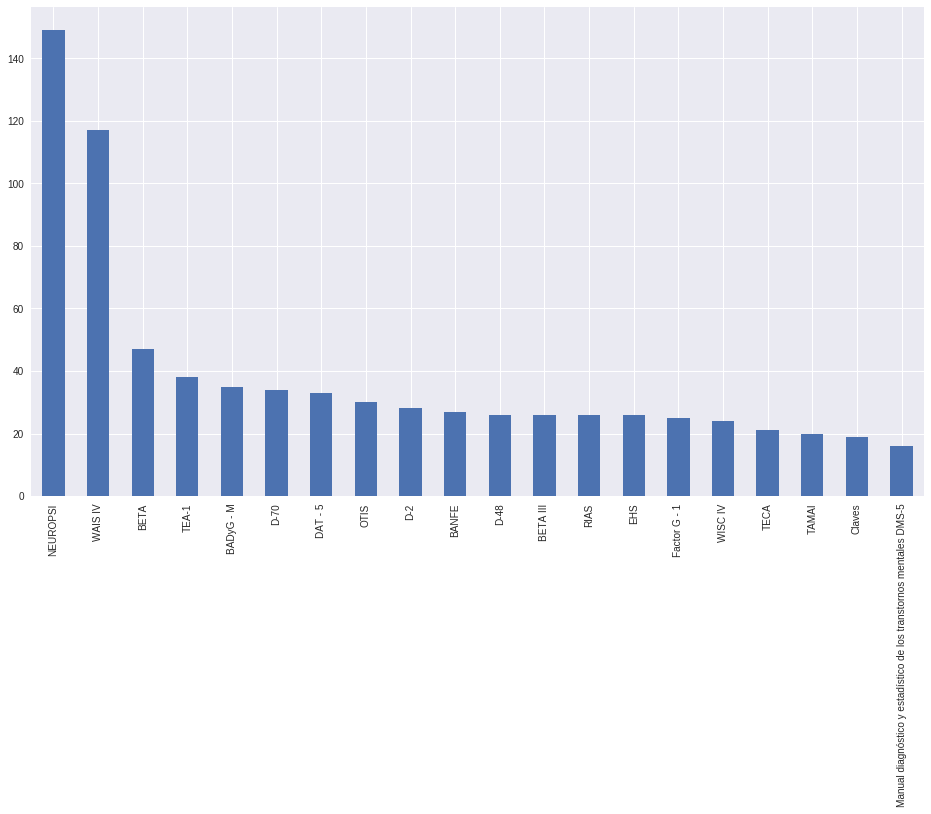

In [24]:
consultas["MATERIAL/ SOLICITADO"].value_counts()[:20].plot.bar(figsize=(16,9))
print(consultas["MATERIAL/ SOLICITADO"].value_counts()[:20])

PSICOMETRÍA BÁSICA                                                            404
MEDICIÓN Y EVALUACIÓN: APTITUDES Y COMPETENCIAS                               306
INTELIGENCIA, LENGUAJE Y CREATIVIDAD                                          163
ATENCIÓN, SENSACIÓN Y PERCEPCIÓN                                               81
EVALUACIÓN Y DIAGNÓSTICO EN CAMPO ELEGIDO-PSICOLOGIA CLINICA Y DE LA SALUD     61
NEUROCIENCIAS DEL COMPORTAMIENTO                                               46
DESARROLLO Y CICLO VITAL: JÓVENES Y ADULTOS                                    27
PSICOLOGÍA JURÍDICA                                                            27
MEDICIÓN Y EVALUACIÓN: ACTITUDES Y CONOCIMIENTOS                               24
INVESTIGACIÓN CUANTITATIVA                                                     15
NEUROBIOLOGÍA DEL COMPORTAMIENTO                                               12
MOTIVACIÓN Y EMOCIÓN                                                           11
Psiología       

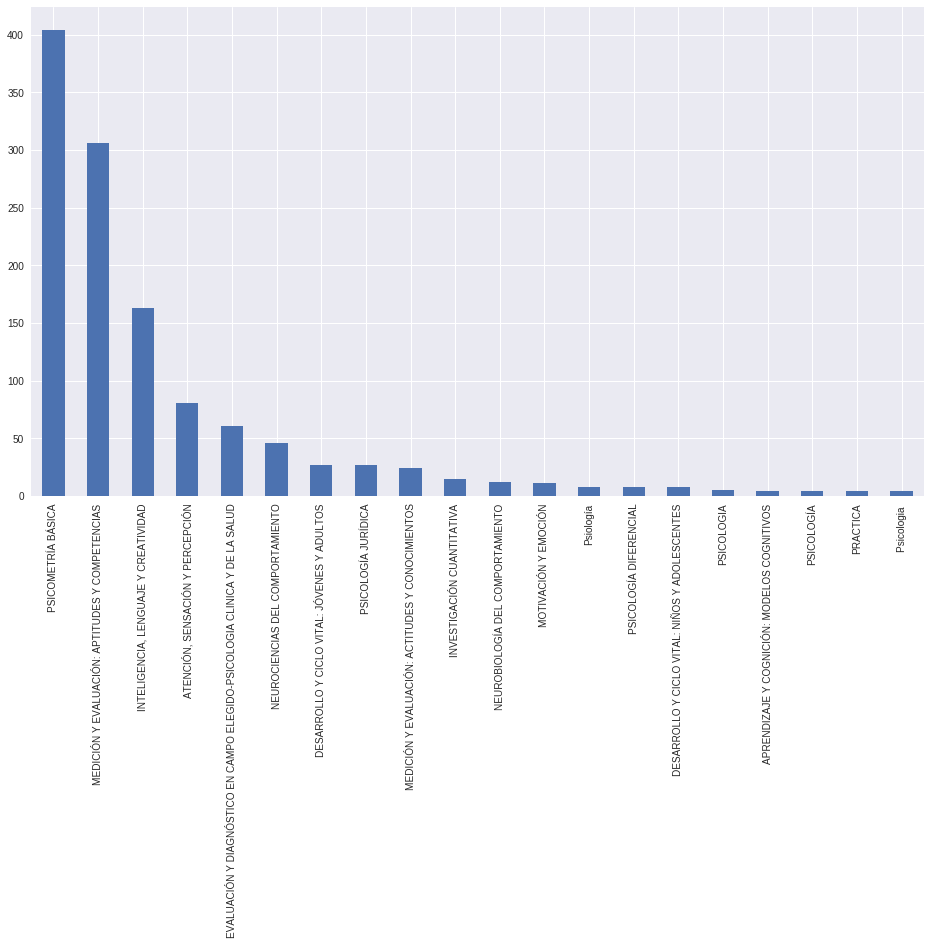

In [25]:
consultas["ASIGNATURA"].value_counts()[:20].plot.bar(figsize=(16,9))
print(consultas["ASIGNATURA"].value_counts()[:20])

3.0    528
2.0    467
1.0    314
Name: CORTE, dtype: int64


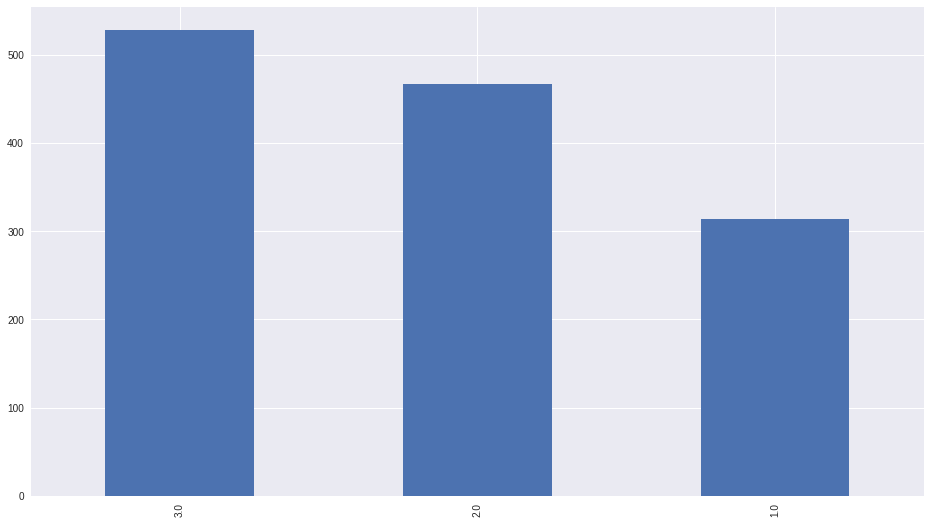

In [26]:
consultas["CORTE"].value_counts().plot.bar(figsize=(16,9))
print(consultas["CORTE"].value_counts())

## Tutorías

In [27]:
print(tutorias.dtypes)

No.                             int64
Id                              int64
NOMBRES Y APELLIDOS            object
CODIGO                        float64
SEMESTRE                      float64
FECHA                  datetime64[ns]
HORA                           object
ASIGNATURA                     object
TEMA                           object
ASESOR                         object
CORTE                         float64
dtype: object


2.0     134
4.0      96
6.0      84
3.0      76
1.0      33
5.0      26
8.0      19
7.0      15
9.0       3
10.0      1
Name: SEMESTRE, dtype: int64


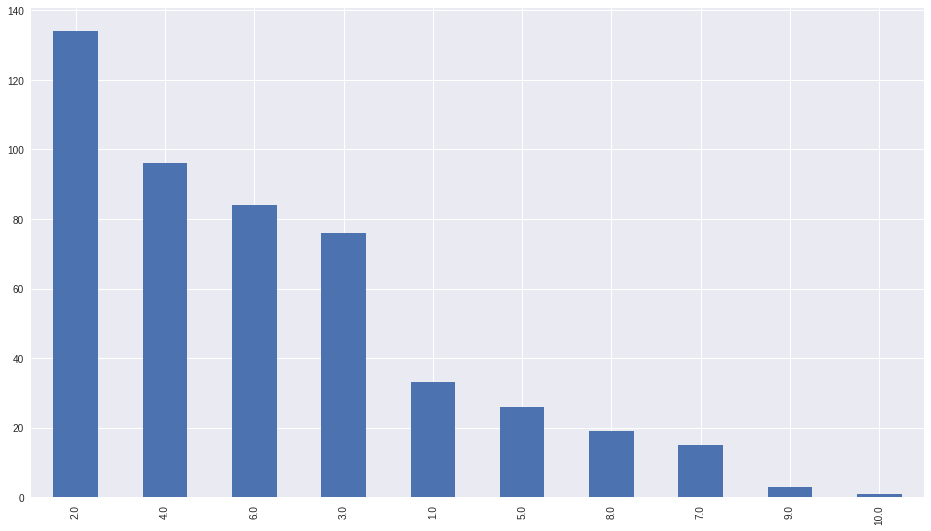

In [28]:
tutorias["SEMESTRE"].value_counts().plot.bar(figsize=(16,9))
print(tutorias["SEMESTRE"].value_counts())

NEUROCIENCIAS DEL COMPORTAMIENTO                                              80
ATENCIÓN, SENSACIÓN Y PERCEPCIÓN                                              76
PSICOMETRÍA BÁSICA                                                            71
INTELIGENCIA, LENGUAJE Y CREATIVIDAD                                          53
MEDICIÓN Y EVALUACIÓN: APTITUDES Y COMPETENCIAS                               46
NEUROBIOLOGÍA DEL COMPORTAMIENTO                                              36
ANORMAL                                                                       25
MOTIVACIÓN Y EMOCIÓN                                                          23
BIOLOGÍA Y GENÉTICA DEL COMPORTAMIENTO                                        14
INVESTIGACIÓN CUANTITATIVA                                                    13
PROYECTO DE INVESTIGACION                                                      8
MEDICIÓN Y EVALUACIÓN: ACTITUDES Y CONOCIMIENTOS                               7
EVALUACIÓN Y DIAGNÓSTICO EN 

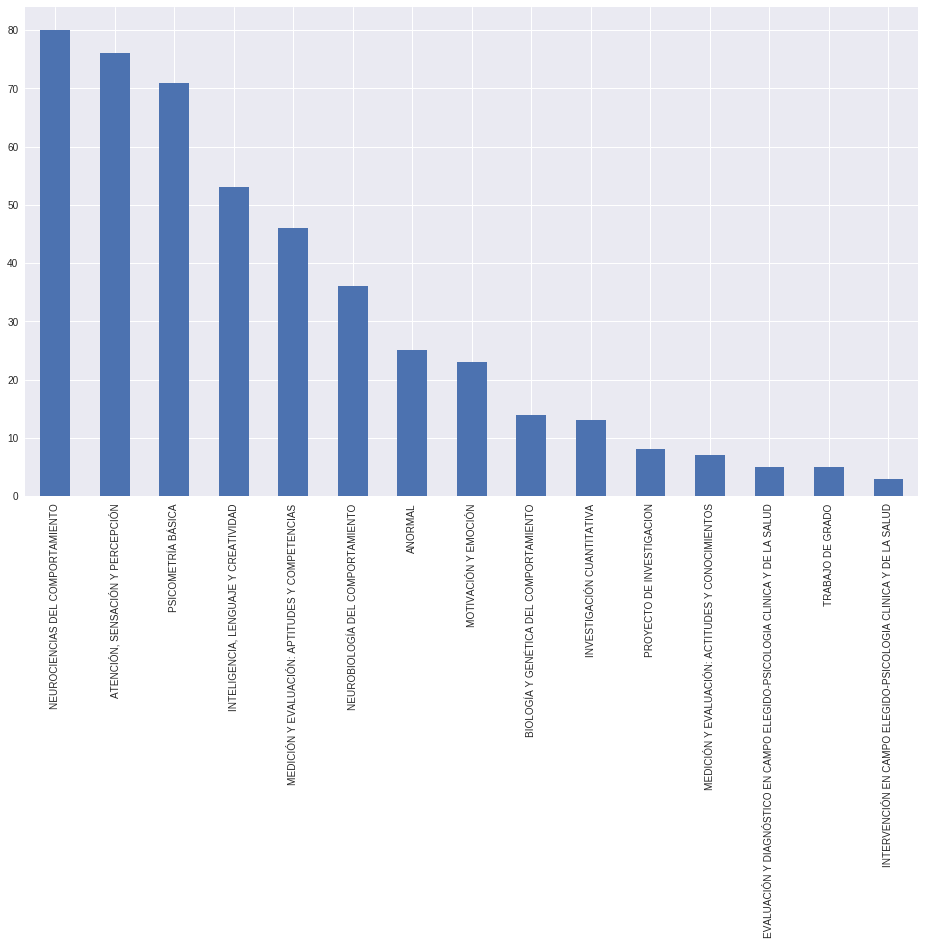

In [29]:
tutorias["ASIGNATURA"].value_counts()[:15].plot.bar(figsize=(16,9))
print(tutorias["ASIGNATURA"].value_counts()[:15])

Jorge Eduardo Moreno    170
Alexis Carrillo         140
Katerin Chavarro         80
Leidy Lopez              75
Johanna Duran            14
José Paramo               2
Jose Estevez              2
Damaris Ramos             2
Name: ASESOR, dtype: int64


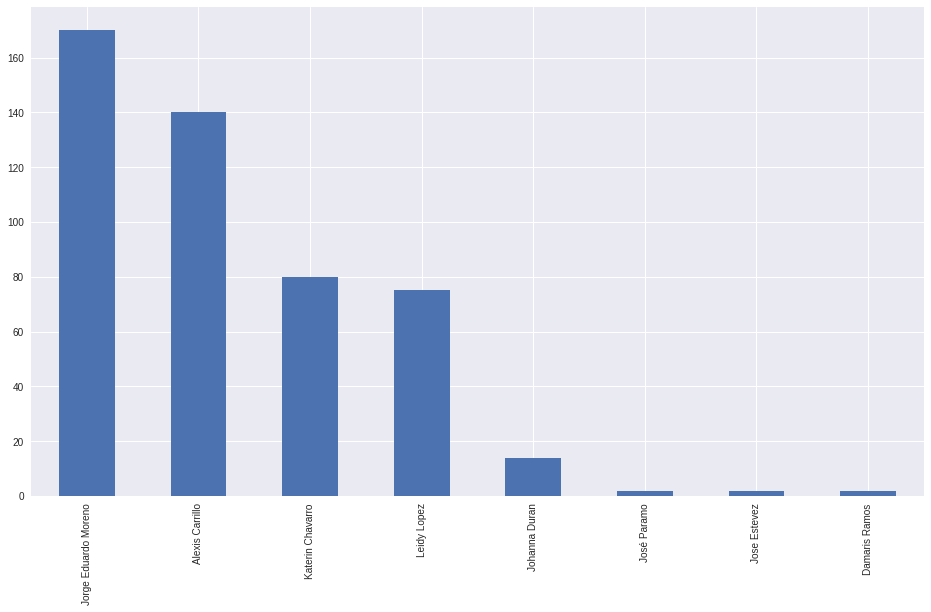

In [30]:
tutorias["ASESOR"].value_counts()[:15].plot.bar(figsize=(16,9))
print(tutorias["ASESOR"].value_counts()[:15])

2.0    180
3.0    174
1.0     76
Name: CORTE, dtype: int64


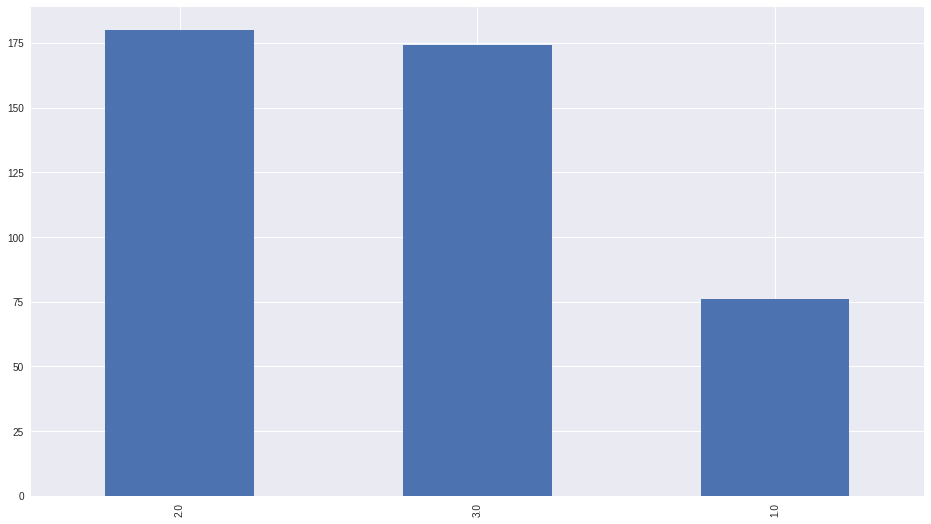

In [31]:
tutorias["CORTE"].value_counts().plot.bar(figsize=(16,9))
print(tutorias["CORTE"].value_counts())

In [32]:
pd.crosstab(tutorias["ASIGNATURA"],#tutorias["ASESOR"],
            tutorias["CORTE"],#tutorias["CORTE"],
            margins=True).sort_values("All", axis=0, ascending=False).iloc[1:15,:-1]#.plot.bar(figsize=(16,9))#,rownames="Nombre Del Docente o Administrativo",columns="Asignatura")

CORTE,1.0,2.0,3.0
ASIGNATURA,,,
NEUROCIENCIAS DEL COMPORTAMIENTO,8,36,30
"ATENCIÓN, SENSACIÓN Y PERCEPCIÓN",3,24,46
PSICOMETRÍA BÁSICA,8,34,13
"INTELIGENCIA, LENGUAJE Y CREATIVIDAD",8,33,11
MEDICIÓN Y EVALUACIÓN: APTITUDES Y COMPETENCIAS,9,28,7
NEUROBIOLOGÍA DEL COMPORTAMIENTO,7,3,15
MOTIVACIÓN Y EMOCIÓN,0,0,23
ANORMAL,11,9,3
INVESTIGACIÓN CUANTITATIVA,12,0,0


## Ventas

In [33]:
ventas.dtypes

ID                                  object
Consecutivo 2019-1                  object
Prueba                              object
Material  Vendido 2019-3            object
Cantidad                             int64
Valor Unitario                       int64
Total                                int64
Fecha                       datetime64[ns]
dtype: object

NEUROPSI_                                                                                   23
Escala de habilidades sociales (EHS)_                                                       10
(Maletin) Wais IV bateria de inteligencia para adultos_                                      7
Cuestionario para la Evaluación de Adoptantes, Cuidadores, Tutores y Mediadores - CUIDA      6
D-2_Hoja de respuesta autocorregible                                                         5
Test autoevaluativo multifactorial de adaptacion infantil (TAMAI)_                           5
cuestionario de personalidad (16PF-5)_                                                       4
Inventario de situaciones y respuestas de ansiedad (ISRA)_                                   4
Naipes (G)_                                                                                  3
Escala de ansiedad manifiesta en niños revisada-2 (CMARS-2)_                                 3
Perfil de estrés de Nowack_                       

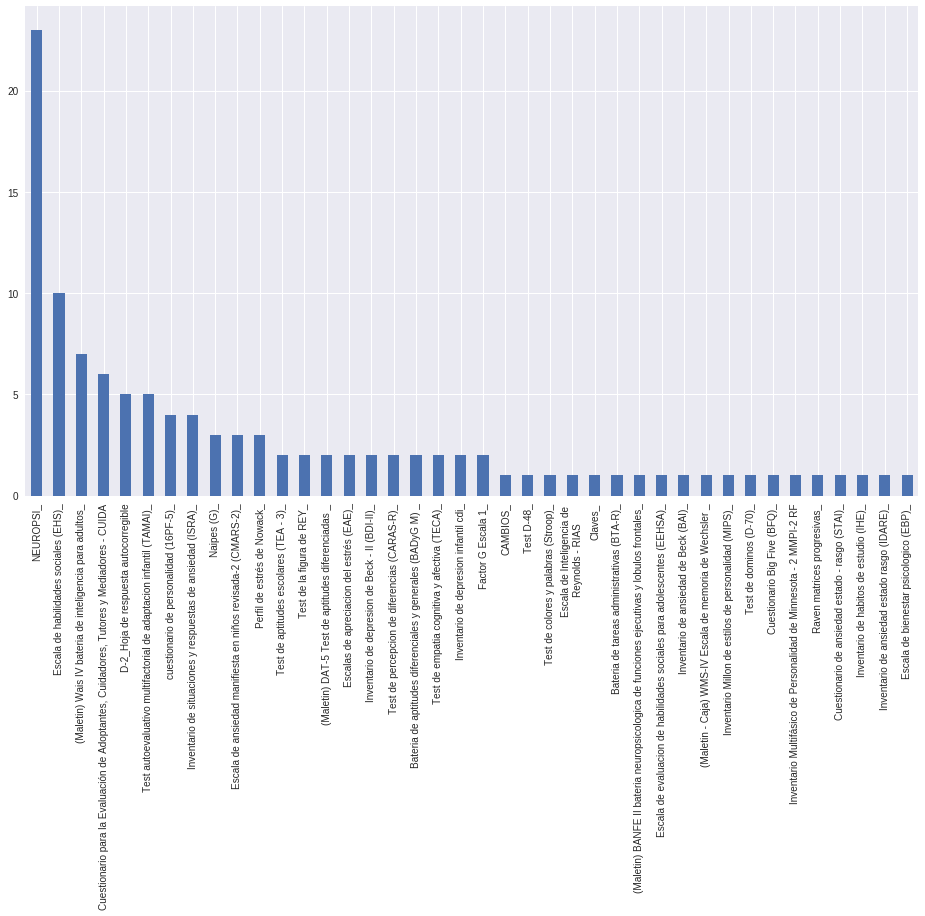

In [34]:
ventas["Prueba "].value_counts().plot.bar(figsize=(16,9))
print(ventas["Prueba "].value_counts())

NEUROPSI_                                                                                   23
Escala de habilidades sociales (EHS)_                                                       10
(Maletin) Wais IV bateria de inteligencia para adultos_                                      7
Cuestionario para la Evaluación de Adoptantes, Cuidadores, Tutores y Mediadores - CUIDA      6
D-2_Hoja de respuesta autocorregible                                                         5
Test autoevaluativo multifactorial de adaptacion infantil (TAMAI)_                           5
cuestionario de personalidad (16PF-5)_                                                       4
Inventario de situaciones y respuestas de ansiedad (ISRA)_                                   4
Naipes (G)_                                                                                  3
Escala de ansiedad manifiesta en niños revisada-2 (CMARS-2)_                                 3
Perfil de estrés de Nowack_                       

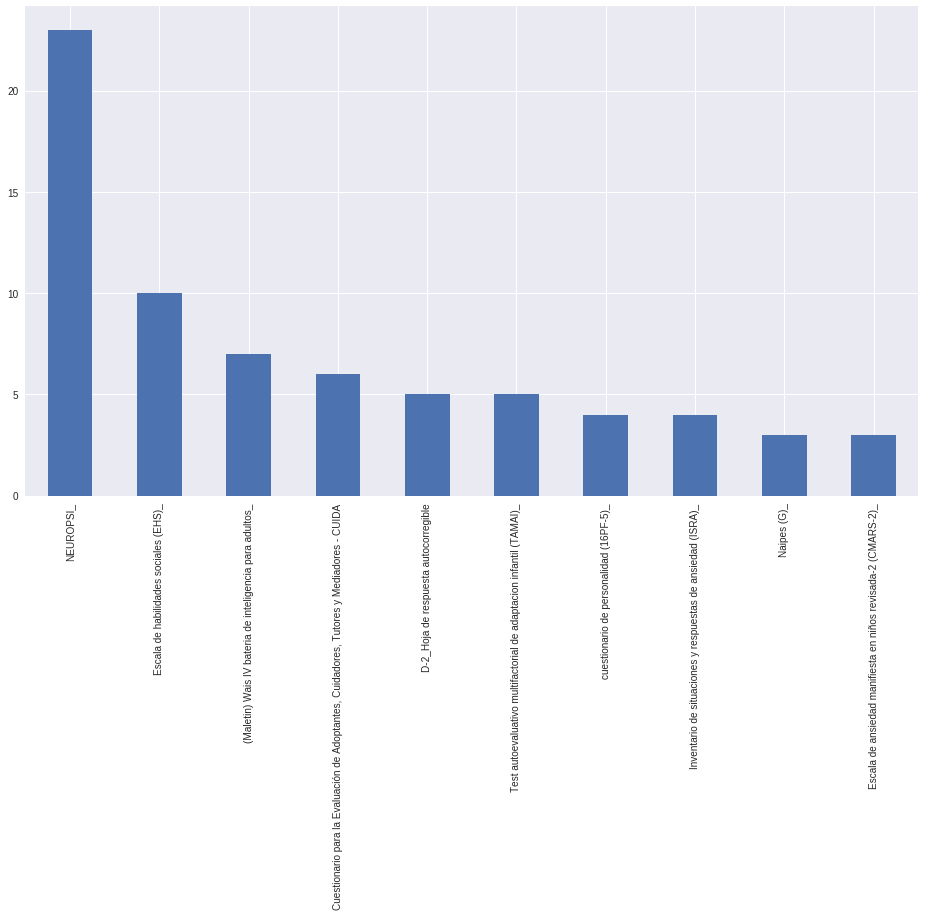

In [35]:
ventas["Prueba "].value_counts()[:10].plot.bar(figsize=(16,9))
print(ventas["Prueba "].value_counts())

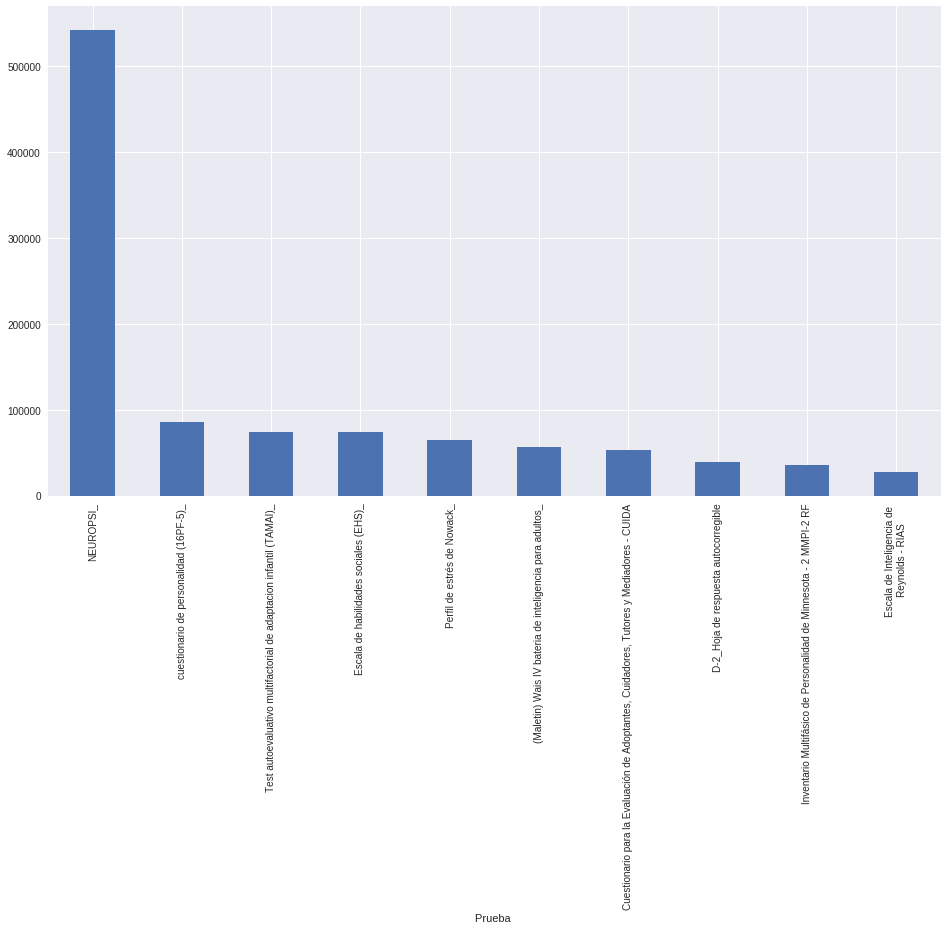

In [36]:
ventas_consolid=pd.pivot_table(ventas, index="Prueba ", values=["Cantidad", "Total"], aggfunc=np.sum)
ventas_consolid["Total"].sort_values(ascending=False)[:10].plot.bar(figsize=(16,9))
# ventas["Prueba "].value_counts().plot.bar(figsize=(16,9))
# print(ventas["Prueba "].value_counts())

## Otras preguntas
### ¿hay correspondencia entre las tutorías y las consultas?

In [37]:
print(consultas.columns)
print(tutorias.columns)
print(practicas.columns)

Index(['No.', 'Id', 'NOMBRES Y APELLIDOS', 'SEMESTRE', 'FECHA', 'HORA',
       'MOTIVO SOLICITUD', 'MATERIAL/ SOLICITADO', 'ASIGNATURA', 'PROGRAMA',
       'CORTE'],
      dtype='object')
Index(['No.', 'Id', 'NOMBRES Y APELLIDOS', 'CODIGO', 'SEMESTRE', 'FECHA',
       'HORA', 'ASIGNATURA', 'TEMA', 'ASESOR', 'CORTE'],
      dtype='object')
Index(['Marca temporal', 'Programa',
       'Nombre del Docente/ Administrativo / Estudiante', 'Tipo de Préstamo ',
       'Asignatura ', 'Semestre ', 'Número de Grupo', 'Número de Estudiantes ',
       'Tema a Trabajar ', 'Fecha Uso de Espacio ', 'Hora de Inicio ',
       'Hora Fin ', 'Espacio Solicitado ', 'Nombre del Material Solicitado ',
       'ejecución'],
      dtype='object')


In [0]:
cons_tut=pd.concat([pd.DataFrame({"FECHA":consultas["FECHA"],
                                  "ASIGNATURA":consultas["ASIGNATURA"],
                                  "REGISTRO":"consultas",
                                  "ocurrencia":1}),
                    pd.DataFrame({"FECHA":tutorias["FECHA"],
                                  "ASIGNATURA":tutorias["ASIGNATURA"],
                                  "REGISTRO":"tutorias",
                                  "ocurrencia":1}),
                    pd.DataFrame({"FECHA":practicas["Fecha Uso de Espacio "],
                                  "ASIGNATURA":practicas["Asignatura "],
                                  "REGISTRO":"practicas",
                                  "ocurrencia":1})])
# cons_tut.FECHA=pd.to_datetime(cons_tut["FECHA"],format='%d/%m/%Y')
# cons_tut.set_index(['FECHA'],inplace=True, drop=False)

In [0]:
cons_tut_2=pd.pivot_table(cons_tut,
                          values="ocurrencia",
                          index=["FECHA","REGISTRO"], 
                          columns=["ASIGNATURA"],
                          aggfunc=np.sum)#.plot()

In [0]:
asigs=["PSICOMETRÍA BÁSICA",
       "MEDICIÓN Y EVALUACIÓN: APTITUDES Y COMPETENCIAS",
       "INTELIGENCIA, LENGUAJE Y CREATIVIDAD",
       "APRENDIZAJE Y COGNICIÓN: MODELOS COGNITIVOS",
       "EVALUACIÓN Y DIAGNÓSTICO EN CAMPO ELEGIDO-PSICOLOGIA CLINICA Y DE LA SALUD",
       "NEUROCIENCIAS DEL COMPORTAMIENTO",
       "APRENDIZAJE Y COGNICIÓN: MODELOS CONDUCTUALES",
       "DESARROLLO Y CICLO VITAL: JÓVENES Y ADULTOS",
       "MEDICIÓN Y EVALUACIÓN: ACTITUDES Y CONOCIMIENTOS",
       "PSICOLOGÍA EDUCATIVA",
       "ATENCIÓN, SENSACIÓN Y PERCEPCIÓN",
       "BIOLOGÍA Y GENÉTICA DEL COMPORTAMIENTO",
       "INVESTIGACIÓN CUANTITATIVA",
       "TEORÍAS Y MÉTODOS EN PSICOLOGÍA: COGNITIVO",
       "EVALUACIÓN Y DIAGNÓSTICO EN CAMPO ELEGIDO-PSICOLOGIA JURIDICA"]

In [0]:
# mat=asigs[0]
# pd.DataFrame({"consultas":cons_tut_2.xs("consultas", level="REGISTRO")[mat],
#               "tutorias":cons_tut_2.xs("tutorias", level="REGISTRO")[mat]}).plot(figsize=(16,9), title=mat, kind="bar")

# #.plot(figsize=(16,9))

In [0]:
cons_practs=pd.DataFrame({"consultas":cons_tut_2.xs("consultas", level="REGISTRO").sum(axis=1),
                          "tutorias":cons_tut_2.xs("tutorias", level="REGISTRO").sum(axis=1),
                          "practicas":cons_tut_2.xs("practicas", level="REGISTRO").sum(axis=1)})

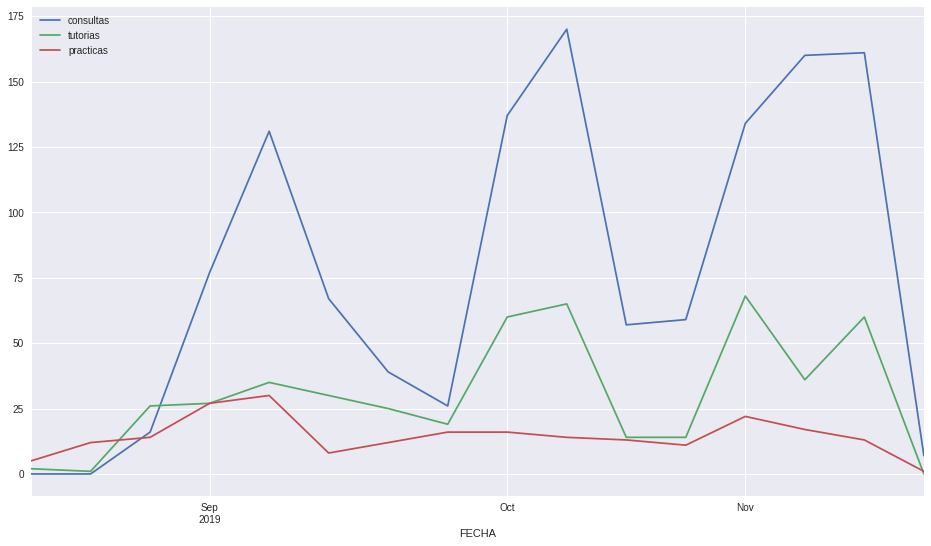

In [43]:
cons_practs["2019-08-04":"2019-11-24"].resample('W').sum().plot(figsize=(16,9))
# cons_practs.resample('W').sum().plot(x="consultas",y="tutorias",figsize=(9,9), kind="scatter")

In [44]:
cons_tut

,FECHA,ASIGNATURA,REGISTRO,ocurrencia
0,2019-08-20 08:17:00,MEDICIÓN Y EVALUACIÓN: ACTITUDES Y CONOCIMIENTOS,consultas,1
1,2019-08-20 08:25:00,MEDICIÓN Y EVALUACIÓN: ACTITUDES Y CONOCIMIENTOS,consultas,1
2,2019-08-20 08:25:00,MEDICIÓN Y EVALUACIÓN: ACTITUDES Y CONOCIMIENTOS,consultas,1
3,2019-08-20 11:00:00,MEDICIÓN Y EVALUACIÓN: ACTITUDES Y CONOCIMIENTOS,consultas,1
4,2019-08-20 12:14:00,INVESTIGACIÓN CUANTITATIVA,consultas,1
...,...,...,...,...
232,2019-10-18 13:00:00,"ATENCIÓN, SENSACIÓN Y PERCEPCIÓN",practicas,1
233,2019-10-18 09:30:00,"ATENCIÓN, SENSACIÓN Y PERCEPCIÓN",practicas,1
234,2019-11-14 10:00:00,"ATENCIÓN, SENSACIÓN Y PERCEPCIÓN",practicas,1
235,2019-11-08 15:30:00,"ATENCIÓN, SENSACIÓN Y PERCEPCIÓN",practicas,1


# Ocupación de espacios y Tiempos

## consultas

In [45]:
consultas_freq=pd.DataFrame({"ocurr":1}, index=consultas.FECHA)
consultas_freq

,ocurr
FECHA,
2019-08-20 08:17:00,1
2019-08-20 08:25:00,1
2019-08-20 08:25:00,1
2019-08-20 11:00:00,1
2019-08-20 12:14:00,1
...,...
2019-11-18 10:00:00,1
2019-11-18 10:13:00,1
2019-11-19 11:12:00,1


In [0]:
consults_hd=consultas_freq.resample('60min').sum()
consults_hd["hora"]=consults_hd.index.hour
consults_hd["dia"]=consults_hd.index.dayofweek #day_name
consults_hd["nm_dia"]=consults_hd.index.weekday_name
consults_hd_pivot=pd.pivot_table(consults_hd, values="ocurr", index="hora", columns="dia", aggfunc=np.sum)

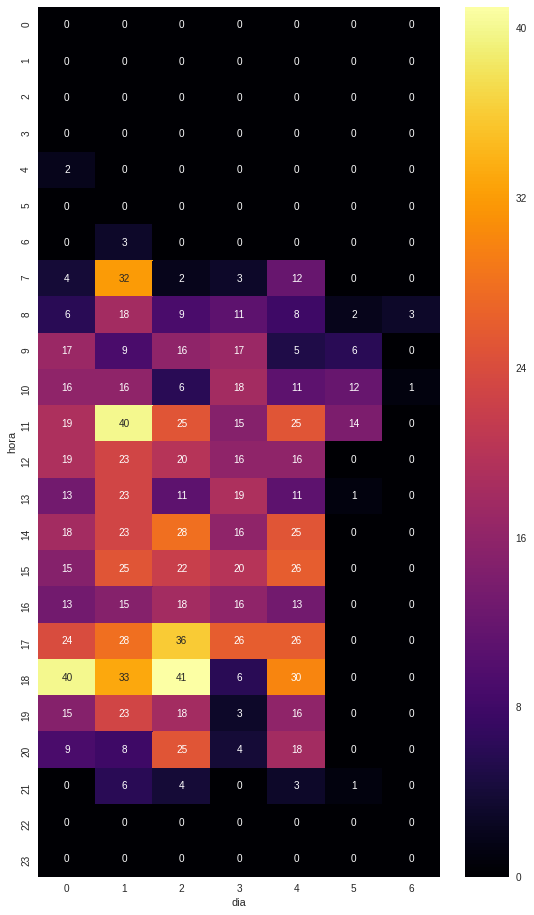

In [47]:
plt.figure(figsize=(9,16))
sns.heatmap(consults_hd_pivot,cmap="inferno", annot=True)

Text(0.5, 1, 'Consultas')

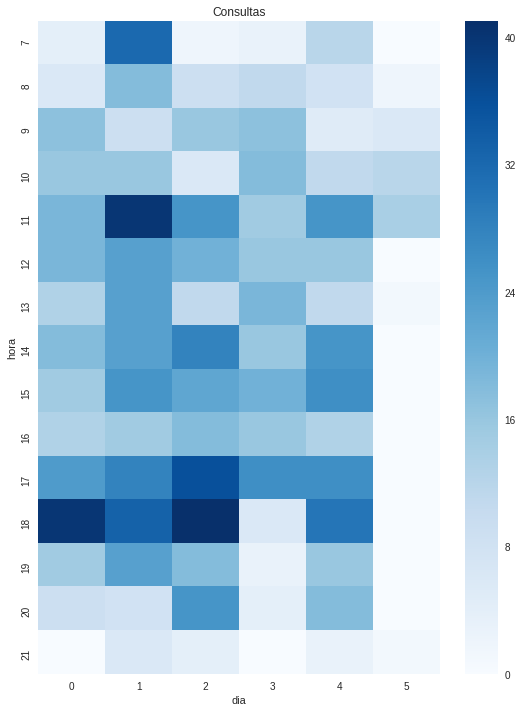

In [48]:
plt.figure(figsize=(9,12))
sns.heatmap(consults_hd_pivot.loc[7:21,0:5],cmap="Blues")
plt.title("Consultas")

## Tutorias

In [49]:
tutorias.columns

Index(['No.', 'Id', 'NOMBRES Y APELLIDOS', 'CODIGO', 'SEMESTRE', 'FECHA',
       'HORA', 'ASIGNATURA', 'TEMA', 'ASESOR', 'CORTE'],
      dtype='object')

In [0]:
tutorias_freq=pd.DataFrame({"ocurr":1}, index=tutorias.FECHA)
tutorias_hd=tutorias_freq.resample('60min').sum()
tutorias_hd["hora"]=tutorias_hd.index.hour
tutorias_hd["dia"]=tutorias_hd.index.dayofweek #day_name
tutorias_hd["nm_dia"]=tutorias_hd.index.weekday_name
tutorias_hd_pivot=pd.pivot_table(tutorias_hd, values="ocurr", index="hora", columns="dia", aggfunc=np.sum)

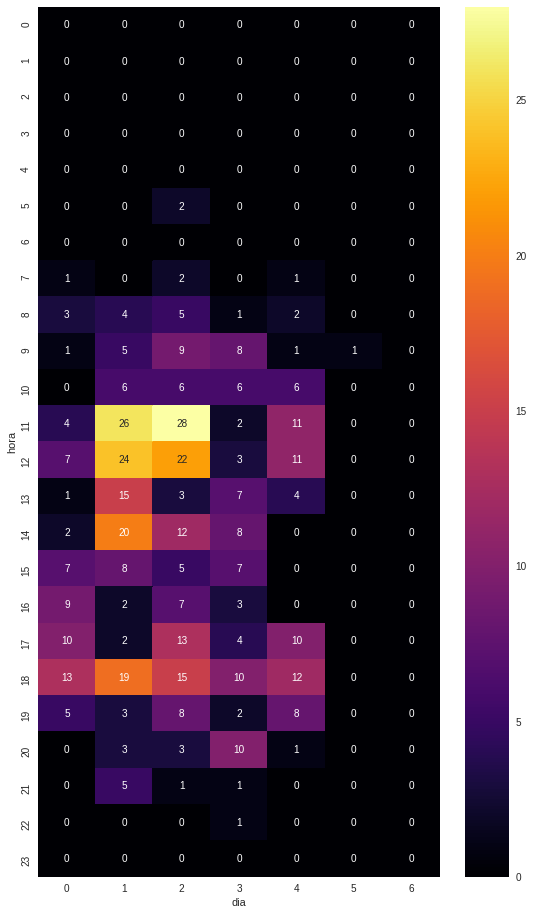

In [51]:
plt.figure(figsize=(9,16))
sns.heatmap(tutorias_hd_pivot,cmap="inferno", annot=True)

Text(0.5, 1, 'Tutorias')

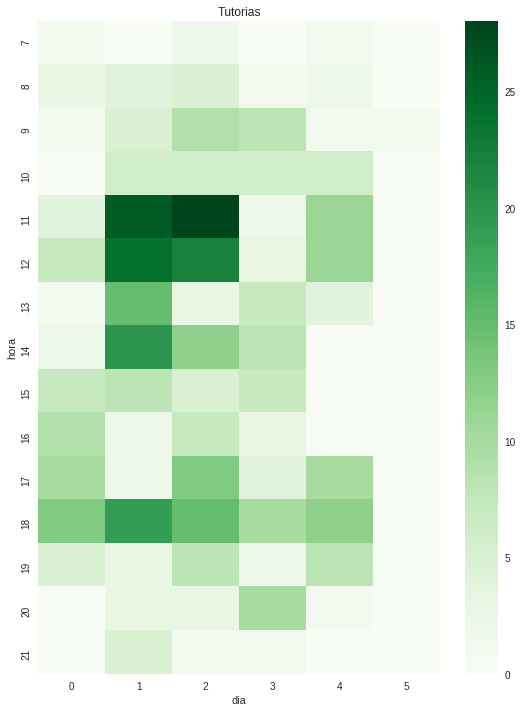

In [52]:
plt.figure(figsize=(9,12))
sns.heatmap(tutorias_hd_pivot.loc[7:21,0:5],cmap="Greens")
plt.title("Tutorias")

## Prácticas

In [53]:
practicas.columns

Index(['Marca temporal', 'Programa',
       'Nombre del Docente/ Administrativo / Estudiante', 'Tipo de Préstamo ',
       'Asignatura ', 'Semestre ', 'Número de Grupo', 'Número de Estudiantes ',
       'Tema a Trabajar ', 'Fecha Uso de Espacio ', 'Hora de Inicio ',
       'Hora Fin ', 'Espacio Solicitado ', 'Nombre del Material Solicitado ',
       'ejecución'],
      dtype='object')

In [0]:
practicas_freq=pd.DataFrame({"ocurr":1}, index=practicas["Fecha Uso de Espacio "])
practicas_hd=practicas_freq.resample('60min').sum()
practicas_hd["hora"]=practicas_hd.index.hour
practicas_hd["dia"]=practicas_hd.index.dayofweek #day_name
practicas_hd["nm_dia"]=practicas_hd.index.weekday_name
practicas_hd_pivot=pd.pivot_table(practicas_hd, values="ocurr", index="hora", columns="dia", aggfunc=np.sum)

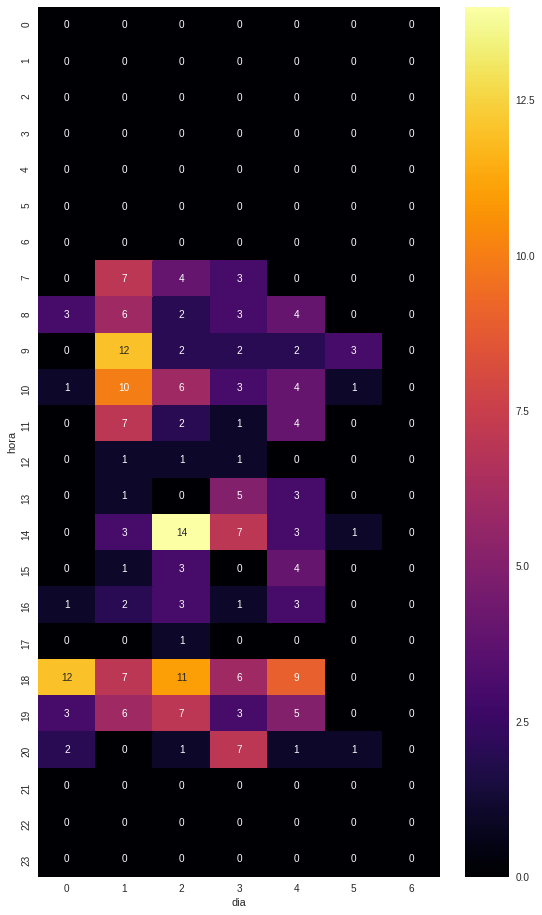

In [55]:
plt.figure(figsize=(9,16))
sns.heatmap(practicas_hd_pivot,cmap="inferno", annot=True)

Text(0.5, 1, 'Prácticas')

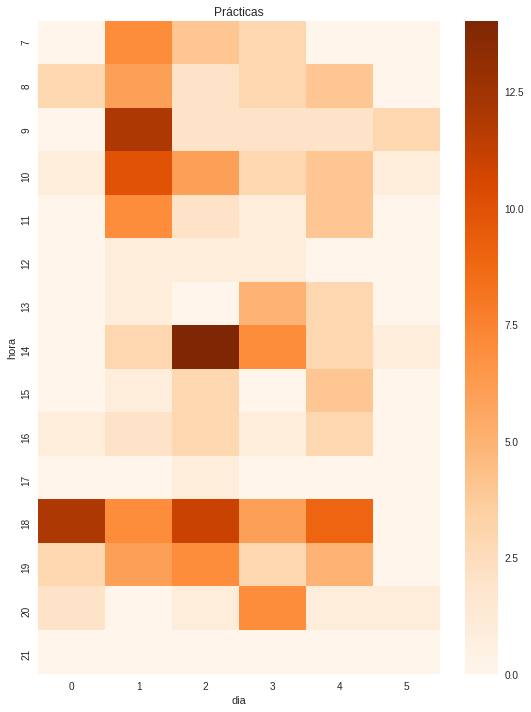

In [56]:
plt.figure(figsize=(9,12))
sns.heatmap(practicas_hd_pivot.loc[7:21,0:5],cmap="Oranges")
plt.title("Prácticas")